In [1]:
#enables chart rendering
%matplotlib inline

In [2]:
!pip install --upgrade --force-reinstal --no-deps git+https://github.com/jlondal/pyrugga.git

  Cloning https://github.com/jlondal/pyrugga.git to /tmp/pip-req-build-_18_u2xn
  Stored in directory: /tmp/pip-ephem-wheel-cache-s774ys0p/wheels/c4/c6/06/41574b4a3a768b91eeec22fe1a22c5ca0f5a9d0bdc0d36c6fa
Successfully built pyrugga
  Found existing installation: pyrugga 1.0.1
    Uninstalling pyrugga-1.0.1:
      Successfully uninstalled pyrugga-1.0.1


# First 10 Minutes 

Welcome to your first 10 minutes with Pyrugga. In this tutorial you will learn how to convert a Superscout XML into a Match object analyse a game of Rugby. 

The first step is to import Pyrugga library. This is as simple us typing 

In [4]:
import pyrugga as pgr
import pandas as pd
import numpy as np

Pyrugga requires a Super Scout file containing a play by play descriptions of a match. They are stored in an XML format which is not great for statistical analysis, but useful for other things. We need to convert the XML format  into something a little more friendly, a Pandas Dataframes. 

In [5]:
df = pgr.Match('game_1.xml')

A Match object contains a number of functions and Dataframes to help us analyse a match 

**Dataframes**

* Summary -- Summary of the match 
* Events -- Description of each action 
* Timeline -- A timeline of the match with periods ending when either possession of the ball changes or there was a stopage in play 

**Functions**


* getRef -- Will return the name of the referee
* Draw -- Will return if the match was drawn ?
* HomeWin -- Will return if home team won ? 
  

* getTerritoryY -- amount of time each team spent in a zone (breadth of the pitch)
* getTerritoryX -- amount of time each team spent in a zone (length of the pitch)
* getTerritory -- amount of time each team spent in a zone (both breadth & length of the pitch)



to view the summary  line of a match

In [6]:
df.summary

,fixture_code,ref_id,ref_name,fixture_date,fx_week,awayteam,hometeam,home_score,away_score
0,719101,204,Peyper,27/10/2018,9,Natal Sharks,Western Province,12,17


to access the first 10 events of a match 

In [7]:
df.events.head(10)

,action_id,additional,advantage,description,event,event_type,fixture_code,home_team_advantage,match_time,metres,...,ps_endstamp,ps_timestamp,set_num,shirt_no,team_name,x_coord,x_coord_end,y_coord,y_coord_end,points
0,18665513,NaN,0,NaN,Period,Start Period,719101.0,0,0,0,...,0,0,0,0.0,Western Province,50,0,34,0,0
0,18665514,NaN,0,NaN,Restart,50m Restart Kick,719101.0,0,0,0,...,0,0,0,15.0,Natal Sharks,50,75,34,57,0
94,18665515,NaN,0,NaN,Collection,Restart Catch,719101.0,0,4,0,...,4,4,1,11.0,Western Province,26,0,13,0,0
65,18665516,NaN,0,NaN,Turnover,Dropped Ball Unforced,719101.0,0,4,0,...,4,4,1,11.0,Western Province,26,0,13,0,0
98,18665517,NaN,0,NaN,Collection,Defensive Loose Ball,719101.0,0,5,0,...,5,5,1,6.0,Natal Sharks,76,0,54,0,0
218,18665518,Neutral Contact,0,Neutral,Carry,Other Carry,719101.0,0,7,0,...,7,7,1,6.0,Natal Sharks,76,0,54,0,0
404,18665519,NaN,0,NaN,Tackle,Line Tackle,719101.0,0,7,0,...,7,7,1,11.0,Western Province,24,0,14,0,0
137,18665520,NaN,0,NaN,Ruck,NaN,719101.0,0,7,0,...,7,7,1,0.0,Natal Sharks,75,0,52,0,0
680,18665521,NaN,0,NaN,Pass,Complete Pass,719101.0,0,7,0,...,7,7,1,9.0,Natal Sharks,75,0,52,0,0
231,18665522,Neutral Contact,0,Crossed Gainline,Carry,One Out Drive,719101.0,0,12,2,...,12,12,1,3.0,Natal Sharks,75,0,52,0,0


to access the the Sharks first periods of play 

In [8]:
df.timeline.query('team_name == "Natal Sharks"').head(3)

,period,set_num,team_name,points,x_coord,x_coord_end,y_coord,y_coord_end,meters_gained,dist_traveled,...,fly_half_defensive,left_wing_defensive,inside_centre_defensive,outside_centre_defensive,right_wing_defensive,full_back_defensive,Natal Sharks,Western Province,Natal Sharks_points,Western Province_points
0,1,1,Natal Sharks,0,74,75,55,22,1,33.015148,...,0,2,0,0,0,0,0.0,0.0,0.0,0.0
1,1,2,Natal Sharks,0,24,59,1,54,35,63.513778,...,1,0,0,0,0,1,0.0,0.0,0.0,0.0
3,1,4,Natal Sharks,0,31,102,21,49,71,76.321688,...,0,0,1,0,0,1,0.0,0.0,0.0,0.0


And so on ...

In [9]:
df.Draw()

False

In [10]:
df.HomeWin()

False

In [11]:
df.getRef()

'Peyper'

# Some Analysis

Lets do to something a little more useful. To working which team had the most possession during a game. 

Remember our match is still stored in variable **df** and it contains three Dataframes called

* **events**, a blow by blow account of every action in a match
* **timelines**, match broken into periods of play ending with a stopage in play or change of posession 
* **summary**, a summary of the match

To access the timeline 

```python
df.timeline
```

then we will want to group by team_name and sum up the length of time each team had the ball. Group by is as simple as just ".groupby('team_name')" 

```python
df.timeline.groupby('team_name') 
```

and then to sum add ".sum()" and for length add "['length']" leaving us with 

In [12]:
df.timeline.groupby('team_name').sum()['length'] 

team_name
Natal Sharks        1349
Western Province     707
Name: length, dtype: int64

The Sharks had the ball 1349 seconds compare to Province 707 secounds.  

If we wanted to see this in a percentage we need to sum the column which requires adding another ".sum()"


In [13]:
df.timeline.groupby('team_name').sum()['length'] / (df.timeline.groupby('team_name').sum()['length'].sum())

team_name
Natal Sharks        0.656128
Western Province    0.343872
Name: length, dtype: float64

Say we want to see points per second with ball. We can see Province was slightly more effective scoring points than The Sharks.

In [14]:
df.timeline.groupby(['team_name']).sum()['length'] / (df.timeline.groupby('team_name')['points'].sum())

team_name
Natal Sharks        96.357143
Western Province    78.555556
dtype: float64

But what about that other TV statistics we tend to see such as territory I here you say. There are three functions to help us calculate that

In [15]:
df.getTerritory(perc=True)

team_name        Natal Sharks  Western Province
y_coord x_coord                                
1       1            0.004286          0.014563
        2            0.010000          0.017799
        3            0.002857          0.009709
        4            0.005714          0.033981
        5            0.048571          0.032362
        6            0.028571          0.022654
        7            0.002857          0.000000
        8            0.014286          0.017799
        9            0.011429          0.008091
        10           0.007143          0.000000
2       1            0.007143          0.014563
        2            0.021429          0.046926
        3            0.025714          0.025890
        4            0.011429          0.056634
        5            0.035714          0.012945
        6            0.055714          0.025890
        7            0.022857          0.006472
        8            0.018571          0.011327
        9            0.000000          0.003236
        10           0.030000          0.001618
3       1            0.000000          0.012945
        2            0.018571          0.019417
        3            0.007143          0.016181
        4            0.015714          0.066343
        5            0.015714          0.045307
        6            0.010000          0.009709
        7            0.021429          0.011327
        8            0.001429          0.006472
        9            0.010000          0.001618
        10           0.012857          0.003236
...                       ...               ...
4       6            0.067143          0.011327
        7            0.004286          0.017799
        8            0.015714          0.008091
        9            0.020000          0.000000
        10           0.011429          0.000000
5       1            0.002857          0.000000
        2            0.020000          0.014563
        3            0.022857          0.008091
        4            0.044286          0.066343
        5            0.010000          0.017799
        6            0.052857          0.017799
        7            0.024286          0.021036
        8            0.008571          0.011327
        9            0.001429          0.004854
        10           0.010000          0.003236
6       1            0.018571          0.011327
        2            0.021429          0.024272
        3            0.008571          0.000000
        4            0.011429          0.029126
        5            0.028571          0.043689
        6            0.007143          0.011327
        7            0.021429          0.000000
        8            0.005714          0.009709
        9            0.011429          0.000000
7       1            0.007143          0.000000
        2            0.002857          0.000000
        4            0.001429          0.000000
        5            0.018571          0.000000
        6            0.000000          0.008091
        8            0.000000          0.030744

[65 rows x 2 columns]

In [16]:
# Territory in the length of the pitch
df.getTerritoryX(perc=True)

team_name,Natal Sharks,Western Province
x_coord,,
1,0.046283,0.063444
2,0.102384,0.129909
3,0.072931,0.087613
4,0.103787,0.255287
5,0.171108,0.148036
6,0.221599,0.110272
7,0.095372,0.058912
8,0.063114,0.119335
9,0.053296,0.019637


In [17]:
# Territory in the width of the pitch
df.getTerritoryY(perc=True)

team_name,Natal Sharks,Western Province
y_coord,,
1,0.133803,0.148318
2,0.226761,0.195719
3,0.112676,0.192661
4,0.160563,0.119266
5,0.204225,0.181957
6,0.132394,0.125382
7,0.029577,0.036697


We can also build out plots to see that the Sharks play slight more on the left side than the right while the Storms do not have much preferance

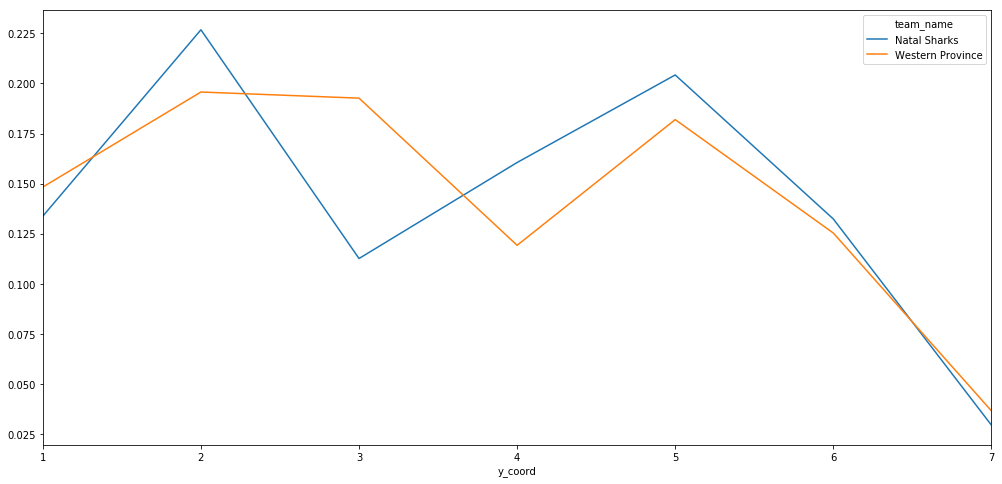

In [18]:
df.getTerritoryY(perc=True).plot(kind='line',figsize=(17,8))

NameError: name 'match' is not defined

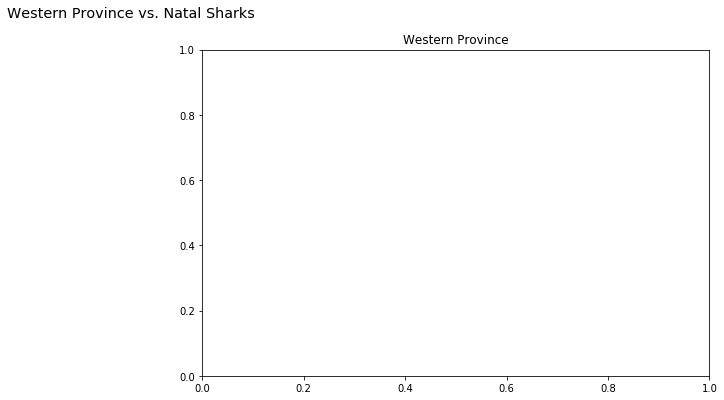

In [19]:
df.heat_map()

## Players

In [17]:
list(df.events.columns)

['action_id',
 'additional',
 'advantage',
 'description',
 'event',
 'event_type',
 'fixture_code',
 'home_team_advantage',
 'match_time',
 'metres',
 'outcome',
 'period',
 'phases',
 'players_name',
 'position',
 'ps_endstamp',
 'ps_timestamp',
 'set_num',
 'shirt_no',
 'team_name',
 'x_coord',
 'x_coord_end',
 'y_coord',
 'y_coord_end',
 'points']

In [57]:
df.events.query('event == "Goal Kick"').groupby('event_type').count()['action_id']

event_type
Conversion      2
Drop Goal       2
Penalty Goal    6
Name: action_id, dtype: int64

In [58]:
df.events.query('event == "Goal Kick"')

,action_id,additional,advantage,description,event,event_type,fixture_code,home_team_advantage,match_time,metres,...,ps_endstamp,ps_timestamp,set_num,shirt_no,team_name,x_coord,x_coord_end,y_coord,y_coord_end,points
671,18665600,NaN,0,NaN,Goal Kick,Drop Goal,719101.0,0,410,0,...,250,250,6,10.0,Western Province,74,104,35,34,0
668,18665793,NaN,0,NaN,Goal Kick,Penalty Goal,719101.0,0,2007,0,...,1207,1207,20,11.0,Western Province,67,0,16,0,3
669,18666017,NaN,0,NaN,Goal Kick,Penalty Goal,719101.0,3,3629,0,...,2671,2671,35,11.0,Western Province,59,0,56,0,3
666,18666029,NaN,0,NaN,Goal Kick,Drop Goal,719101.0,6,3718,0,...,2720,2720,36,15.0,Natal Sharks,57,104,34,36,0
672,18666208,NaN,0,NaN,Goal Kick,Conversion,719101.0,1,4624,0,...,4029,4029,44,10.0,Natal Sharks,85,107,23,34,2
670,18666257,NaN,0,NaN,Goal Kick,Penalty Goal,719101.0,-1,5010,0,...,4255,4255,47,11.0,Western Province,79,0,46,0,3
673,18666317,NaN,0,NaN,Goal Kick,Penalty Goal,719101.0,2,5341,0,...,4538,4538,49,10.0,Natal Sharks,91,0,30,0,3
667,18666473,NaN,0,NaN,Goal Kick,Penalty Goal,719101.0,-1,6109,0,...,5161,5161,62,15.0,Natal Sharks,54,0,52,0,0
674,18666747,NaN,0,NaN,Goal Kick,Conversion,719101.0,-6,7236,0,...,6140,6140,72,10.0,Natal Sharks,75,107,12,38,2
675,18666772,NaN,0,NaN,Goal Kick,Penalty Goal,719101.0,-8,7522,0,...,6306,6306,74,12.0,Western Province,55,0,25,0,3


In [178]:
import sqlite3
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import os
import uuid

"""
norm = ['min','actions','phases']
"""
def player_summary(self,norm=None):

    tmp_filename = str(uuid.uuid4())
    conn = sqlite3.connect(tmp_filename)

    engine = create_engine('sqlite:///%s' % (tmp_filename))

    self.events.to_sql('match_events',engine,if_exists='replace',index=False)
    
    # Generates a time of the match
    sql = """
     select
    team_name, position, players_name,
    count(distinct action_id) as actions,
    max(match_time) - min(match_time) as mins,
    avg(phases) as average_phase,
    sum(phases) as phases,
    sum(points) as points_scored,
    sum(metres) as meters_gained,
    ((x_coord - x_coord_end)*(x_coord - x_coord_end)) + ((y_coord - y_coord_end)*(y_coord - y_coord_end)) as dist_traveled,

    -- carry profile
    sum(case when event = 'Carry' then 1.0 else 0.0 end ) as carry,
    sum(case 
        when event = 'Carry' and 
        description in ('Crossed Gainline','Failed Gainline','Neutral')
        then 1.0 else 0.0 end ) as gainline_attempts,    
    sum(case when description = 'Crossed Gainline' then 1.0 else 0.0 end ) as crossed_gainline,    
    sum(case when event_type = 'One Out Drive' then 1.0 else 0.0 end ) as one_out_drive,
    sum(case when event_type = 'One Out Drive' and description = 'Crossed Gainline'  then 1.0 else 0.0 end ) as one_out_drive_crossed_gainline,
    sum(case when event_type = 'Support Carry' and description = 'Crossed Gainline' then 1.0 else 0.0 end ) as support_carry_crossed_gainline,    
    sum(case when event_type = 'Support Carry'  then 1.0 else 0.0 end ) as support_carry,    
    sum(case when event_type = 'Pick And Go' and description = 'Crossed Gainline' then 1.0 else 0.0 end ) as pick_and_go_crossed_gainline,   
    sum(case when event_type = 'Restart Return' then 1.0 else 0.0 end ) as retstart_return,
    sum(case when event_type = 'Kick Return' then 1.0 else 0.0 end ) as kick_return,    
    sum(case when event_type = 'Restart Return' then 1.0 else 0.0 end ) as restart_return,
    sum(case when event_type = 'Initial Break' then 1.0 else 0.0 end ) as initial_break,
    sum(case when event_type = 'Supported Break' then 1.0 else 0.0 end ) as supported_break, 
    sum(case when event_type = 'Defender Beaten' then 1.0 else 0.0 end ) as defender_beaten,

    -- kick profile 
    sum(case when event = 'Kick' then 1.0 else 0.0 end ) as kick,
    sum(case when event = 'Kick In Play' then 1.0 else 0.0 end ) as kick_in_play,
    sum(case when event = 'Kick In Own 22' then 1.0 else 0.0 end ) as kick_in_own_22,
    sum(case when event = 'Bomb' then 1.0 else 0.0 end ) as bomb,
    sum(case when event = 'Chip' then 1.0 else 0.0 end ) as chip,
    sum(case when event = 'Cross Pitch' then 1.0 else 0.0 end ) as cross_pitch,
    sum(case when event = 'Territorial' then 1.0 else 0.0 end ) as territorial,
    sum(case when event = 'Kick In Touch (Bounce)' then 1.0 else 0.0 end ) as kick_in_touch_bounce,
    sum(case when event = 'Kick In Touch (Full)' then 1.0 else 0.0 end ) as kick_in_touch_full,

    -- pass profile
    sum(case when event = 'Pass' then 1.0 else 0.0 end ) as pass,        
    sum(case when event = 'Off Load' then 1.0 else 0.0 end ) as off_load,
    sum(case when event = 'Lateral Offload' then 1.0 else 0.0 end ) as lateral_offload,
    sum(case when event = 'Backward Offload' then 1.0 else 0.0 end ) as backward_offload,
    sum(case when event = 'Forward Pass' then 1.0 else 0.0 end ) as forward_pass,
    sum(case when event = 'Incomplete Pass' then 1.0 else 0.0 end ) as incomplete_pass,
    sum(case when event = 'Intercepted Pass' then 1.0 else 0.0 end ) as intercepted_pass,
    sum(case when event = 'Key Pass' then 1.0 else 0.0 end ) as key_pass,
    sum(case when event = 'Off Target Pass' then 1.0 else 0.0 end ) as off_target_pass,
    sum(case when event = 'Try Pass' then 1.0 else 0.0 end ) as try_pass,
    sum(case when event = 'Pass Error' then 1.0 else 0.0 end ) as pass_error,
    sum(case when event = 'Right Pass' then 1.0 else 0.0 end ) as right_pass,
    sum(case when event = 'Left Pass' then 1.0 else 0.0 end ) as left_pass,
    sum(case when event = 'Long Pass' then 1.0 else 0.0 end ) as long_pass,
    sum(case when event = 'Short Pass' then 1.0 else 0.0 end ) as short_pass,

    -- tackle profile

    sum(case when event = 'Tackle' then 1.0 else 0.0 end ) as tackle,
    sum(case when event = 'Missed Tackle' then 1.0 else 0.0 end ) as missed_tackle,    
    sum(case when event_type = 'Chase Tackle' then 1.0 else 0.0 end ) as chase_tackle,
    sum(case when event_type = 'Cover Tackle' then 1.0 else 0.0 end ) as cover_tackle,
    sum(case when event_type = 'Line Tackle' then 1.0 else 0.0 end ) as line_tackle,
    sum(case when event_type = 'Guard Tackle' then 1.0 else 0.0 end ) as guard_tackle,
    sum(case when event_type = 'Edge Tackle' then 1.0 else 0.0 end ) as edge_tackle,   
    sum(case when event_type = 'Forced In Touch' then 1.0 else 0.0 end ) as forced_in_touch,
    sum(case when event_type = 'Offload Allowed' then 1.0 else 0.0 end ) as offload_allowed,
    sum(case when event_type = 'Sack' then 1.0 else 0.0 end ) as sack,
    sum(case when event_type = 'Bumped Off' then 1.0 else 0.0 end ) as bumped_off,
    sum(case when event_type = 'Stepped' then 1.0 else 0.0 end ) as stepped,
    sum(case when event_type = 'Outpaced' then 1.0 else 0.0 end ) as outpaced,
    sum(case when event = 'Tackle' and description = 'Tackle Assist' then 1.0 else 0.0 end ) as assist_tackle,

    -- scrum profile
    sum(case when event = 'Scrum' then 1.0 else 0.0 end ) as scrum,
    sum(case when event = 'Scrum' and description = 'Negative' then 1.0 else 0.0 end ) as scrum_neg,
    sum(case when event = 'Scrum' and description = 'Positive' then 1.0 else 0.0 end ) as scrum_pos,
    sum(case when event = 'Offensive Scrum' then 1.0 else 0.0 end ) as offensive_scrum,
    sum(case when event = 'Defensive Scrum' then 1.0 else 0.0 end ) as defensive_scrum,
    sum(case when event = 'Scrum Offence' then 1.0 else 0.0 end ) as scrum_offence,

    -- lineout profile

    sum(case when event = 'Lineout Throw' then 1.0 else 0.0 end ) as lineout_throw,   
    sum(case when event = 'Lineout Take' then 1.0 else 0.0 end ) as lineout_take,
    sum(case when event_type = 'Lineout Steal Front' then 1.0 else 0.0 end ) as lineout_steal_front,
    sum(case when event_type = 'Lineout Steal Middle' then 1.0 else 0.0 end ) as lineout__steal_mid,
    sum(case when event_type = 'Lineout Steal Back' then 1.0 else 0.0 end ) as lineout__steal_back,
    sum(case when event_type = 'Lineout Win Back' then 1.0 else 0.0 end ) as lineout_win_back,
    sum(case when event_type = 'Lineout Win Front' then 1.0 else 0.0 end ) as lineout_win_front,
    sum(case when event_type = 'Lineout Win Middle' then 1.0 else 0.0 end ) as lineout_mid,
    sum(case when description = 'Catch And Drive' then 1.0 else 0.0 end ) as catch_and_drive,
    sum(case when description = 'Catch And Pass' then 1.0 else 0.0 end ) as catch_and_pass,
    sum(case when description = 'Off The Top' then 1.0 else 0.0 end ) as off_the_top,
    sum(case when event_type = 'Lineout Offence' then 1.0 else 0.0 end ) as lineout_offence,   


    sum(case when event = 'Penalty Conceded' then 1.0 else 0.0 end ) as penalty_conceded,
    sum(case when event_type = 'Not Releasing' then 1.0 else 0.0 end ) as not_releasing,
    sum(case when event_type = 'Hands In Ruck' then 1.0 else 0.0 end ) as hands_in_ruck,
    sum(case when event_type = 'Wrong Side' then 1.0 else 0.0 end ) as wrong_side,
    sum(case when event_type = 'Offside' then 1.0 else 0.0 end ) as offside,
    sum(case when event_type = 'Not Rolling Away' then 1.0 else 0.0 end ) as not_rolling_away,
    sum(case when event_type = 'Foul Play - Foot Contact' then 1.0 else 0.0 end ) as foul_play_foot_contact,
    sum(case when event_type = 'Foul Play - Mid Air Tackle' then 1.0 else 0.0 end ) as foul_play_mid_air_tackle,
    sum(case when event_type = 'Foul Play - High Tackle' then 1.0 else 0.0 end ) as foul_play_high_tackle,
    sum(case when event_type = 'Foul Play - Other' then 1.0 else 0.0 end ) as foul_play_other,
    sum(case when event_type = 'Obstruction' then 1.0 else 0.0 end ) as obstruction,

    sum(case when event = 'Turnover' then 1.0 else 0.0 end ) as turnover,
    sum(case when event_type = 'Turnover Won' then 1.0 else 0.0 end ) as turnover_won,    
    sum(case when event = 'Try' then 1.0 else 0.0 end ) as try,
    sum(case when event = 'Goal Kick' then 1.0 else 0.0 end ) as goal_kick,

    sum(case when event_type = 'Conversion' then 1.0 else 0.0 end ) as conversion,
    sum(case when event_type = 'Drop Goal' then 1.0 else 0.0 end ) as drop_goal,
    sum(case when event_type = 'Penalty Goal' then 1.0 else 0.0 end ) as penalty_kick,

    sum(case when event = 'Collection' then 1.0 else 0.0 end ) as collection,
    sum(case when event = 'Card' then 1.0 else 0.0 end ) as card


     from
     match_events
     where
     position > 0
     group by
     team_name, position, players_name
     order by
     team_name, position, players_name

    """
  

    timeline = pd.io.sql.read_sql(sql,conn)
    
    os.remove(tmp_filename)

    timeline['dist_traveled'] = np.sqrt(timeline['dist_traveled'])

    timeline = timeline.set_index(['team_name', 'position', 'players_name']) 
    
    
    if norm == 'min':
        timeline.iloc[:,3:] = timeline.iloc[:,3:].div(timeline['mins'], axis=0)
    elif norm == 'actions':
        timeline.iloc[:,3:] = timeline.iloc[:,3:].div(timeline['actions'], axis=0) 
    elif norm == 'phases':
        timeline.iloc[:,3:] = timeline.iloc[:,3:].div(timeline['phases'], axis=0)        

    return timeline 

In [181]:
pdf = player_summary(df,norm='phases')
pdf

actions  mins  average_phase  \
team_name        position players_name                                         
Natal Sharks     1.0      Juan Schoeman              48  8187       1.895833   
                 2.0      Armand van der Merwe       31  6192       3.129032   
                          Chiliboy Ralepelle         12  1268       3.666667   
                 3.0      Coenraad Oosthuizen        27  4086       2.111111   
                          Thomas du Toit             22  4098       1.681818   
                 4.0      Gideon Koegelenberg        23  7341       2.956522   
                 5.0      Hyron Andrews              12  6295       1.916667   
                 6.0      Tyler Paul                 31  7408       2.677419   
                 7.0      Jacques Vermeulen          16  1813       2.437500   
                          Jean-Luc du Preez          26  5537       2.576923   
                 8.0      Daniel du Preez            44  7987       3.022727   
                 9.0      Cameron Wright             36  1344       4.638889   
                          Louis Schreuder            60  6297       2.850000   
                 10.0     Robert du Preez            42  8095       1.833333   
                 11.0     Aphelele Fassi             20  7625       2.250000   
                 12.0     Marius Louw                17  7377       3.470588   
                 13.0     Jeremy Ward                12  7645       2.083333   
                 14.0     Sibusiso Nkosi             24  6892       2.166667   
                 15.0     Curwin Bosch               19  6109       1.263158   
                          Jacobus Van Wyk             8  1094       2.500000   
Western Province 1.0      Alistair Vermaak           35  8089       1.942857   
                          Caylib Oosthuizen           4   603       4.250000   
                 2.0      Mbongeni Mbonami           16  3726       1.437500   
                          Siyabonga Ntubeni          23  3861       2.434783   
                 3.0      Michael Kumbirai           11  1469       2.272727   
                          Wilco Louw                 32  6007       1.968750   
                 4.0      Chris Van Zyl              15  5606       2.000000   
                          Salmaan Moerat              9  1925       3.000000   
                 5.0      JD Schickerling            33  7841       3.575758   
                 6.0      Kobus Van Dyk              17  5991       2.235294   
                 7.0      Ernst van Rhyn             29  7677       3.827586   
                 8.0      Jaco Coetzee                8  2891       4.750000   
                          Sikhumbuzo Notshe          22  5506       3.000000   
                 9.0      Hershel Jantjies           66  6888       2.575758   
                          Justin Phillips             7   447       2.857143   
                 10.0     Dan Kriel                   5   146       2.800000   
                          Joshua Stander             47  7071       2.617021   
                 11.0     JJ Engelbrecht              8  1597       1.625000   
                          SP Marais                  21  5006       1.523810   
                 12.0     Damian Willemse            35  7602       1.942857   
                 13.0     Ruhan Nel                  27  7360       3.259259   
                 14.0     Sergeal Petersen           24  7218       2.875000   
                 15.0     Dillyn Leyds               36  7532       2.888889   

                                                phases  points_scored  \
team_name        position players_name                                  
Natal Sharks     1.0      Juan Schoeman            1.0       0.000000   
                 2.0      Armand van der Merwe     1.0       0.051546   
                          Chiliboy Ralepelle       1.0       0.000000   
                 3.0      Coenraad Oosthuizen      1.0       0.000000   
         

In [72]:
base = [
 'team_name',
 'position',
 'players_name',
 'actions',
 'points_scored',
 'meters_gained',
 'average_phase',
 'dist_traveled',
 'penalty_conceded',
 'card'
]

carrys = base + [
 'carry',
 'gainline_attempts',
 'crossed_gainline',
 'one_out_drive',
 'one_out_drive_crossed_gainline',
 'support_carry_crossed_gainline',
 'support_carry',
 'pick_and_go_crossed_gainline',
 'retstart_return',
 'initial_break',
 'supported_break',
 'defender_beaten',
 'not_releasing',
 'collection',
 'obstruction',
 'turnover'
]

kicks = base + [
 'kick_return',
 'restart_return',
 'kick',
 'kick_in_play',
 'kick_in_own_22',
 'bomb',
 'chip',
 'cross_pitch',
 'territorial',
 'kick_in_touch_bounce',
 'kick_in_touch_full'
    
]

passes = base + [
 'pass',
 'off_load',
 'lateral_offload',
 'backward_offload',
 'forward_pass',
 'incomplete_pass',
 'intercepted_pass',
 'key_pass',
 'off_target_pass',
 'try_pass',
 'pass_error',
 'right_pass',
 'left_pass',
 'long_pass',
 'short_pass'
]

tackles = base + [
 'tackle',
 'missed_tackle',
 'chase_tackle',
 'cover_tackle',
 'line_tackle',
 'guard_tackle',
 'edge_tackle',
 'forced_in_touch',
 'offload_allowed',
 'sack',
 'bumped_off',
 'stepped',
 'outpaced',
 'assist_tackle',
 'not_releasing',
 'hands_in_ruck',
 'wrong_side',
 'offside',
 'not_rolling_away',
 'foul_play_high_tackle',
 'foul_play_foot_contact',
 'foul_play_mid_air_tackle',
 'turnover_won'
]


scrum = base + [
 'scrum',
 'scrum_neg',
 'scrum_pos',
 'offensive_scrum',
 'defensive_scrum',
 'scrum_offence'
]

lineout = base + [
 'lineout_throw',
 'lineout_take',
 'lineout_steal_front',
 'lineout__steal_mid',
 'lineout__steal_back',
 'lineout_win_back',
 'lineout_win_front',
 'lineout_mid',
 'catch_and_drive',
 'catch_and_pass',
 'off_the_top',
 'lineout_offence'
]
 
points = base + [ 
 'try',
 'goal_kick',
 'conversion',
 'drop_goal',
 'penalty_kick'
]

In [111]:
pdf[carrys]

KeyError: "['team_name', 'players_name', 'position'] not in index"